# Recommender system in movie rating data

## Step 1: Load the data

In [1]:
import pandas as pd

In [2]:
df_links = pd.read_csv('./links.csv')
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [3]:
df_movies = pd.read_csv('./movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_ratings = pd.read_csv('./ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_tags = pd.read_csv('./tags.csv')
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.utils import shuffle

import numpy as np
import matplotlib.pyplot as plt

In [7]:
df_ratings.userId = pd.Categorical(df_ratings.userId)
df_ratings['new_userId'] = df_ratings.userId.cat.codes

In [8]:
df_ratings.head()

,userId,movieId,rating,timestamp,new_userId
0,1,1,4.0,964982703,0
1,1,3,4.0,964981247,0
2,1,6,4.0,964982224,0
3,1,47,5.0,964983815,0
4,1,50,5.0,964982931,0


In [9]:
df_ratings.movieId = pd.Categorical(df_ratings.movieId)
df_ratings['new_movieId'] = df_ratings.movieId.cat.codes

In [10]:
df_ratings.head()

,userId,movieId,rating,timestamp,new_userId,new_movieId
0,1,1,4.0,964982703,0,0
1,1,3,4.0,964981247,0,2
2,1,6,4.0,964982224,0,5
3,1,47,5.0,964983815,0,43
4,1,50,5.0,964982931,0,46


In [11]:
userId = df_ratings.new_userId.values
movieId = df_ratings.new_movieId.values
rating = df_ratings.rating.values

In [12]:
N = len(userId)
M = len(movieId)

K = 10

## Step 2: Build the model

Input format must be in form of (train_user, train movie) and train_rating. 

Validation set format is (test_user, test movie) and test_rating.

In [13]:
u = Input(shape=(1,))
m = Input(shape=(1,))

u_emb = Embedding(N,K)(u) # output is (num_samples X 1 X K)
m_emb = Embedding(M,K)(m) # output is (num_samples X 1 X K)

u_emb = Flatten()(u_emb) # Now it is (num_samples, K)
m_emb = Flatten()(m_emb) # Now it is (num_samples, K)

x = Concatenate()([u_emb, m_emb]) # Now it's (num_samples, 2K)

x = Dense(512, activation = 'relu')(x)
x = Dense(1)(x)

In [14]:
model = Model(inputs = [u,m], outputs = x)

In [15]:
model.compile(loss = 'mse', optimizer = SGD(lr = 0.08, momentum = 0.9))

In [16]:
userId, movieId, rating = shuffle(userId, movieId, rating)

## Step 3: Train

In [17]:
Ntrain = int(0.8 * len(userId))

In [18]:
train_user = userId[:Ntrain]
train_movie = movieId[:Ntrain]
train_rating = rating[:Ntrain]

test_user = userId[Ntrain:]
test_movie = movieId[Ntrain:]
test_rating = rating[Ntrain:]

avg_rating = train_rating.mean()
train_rating = train_rating - avg_rating
test_rating = test_rating - avg_rating

In [19]:
r = model.fit(x = [train_user, train_movie], y = train_rating, epochs = 25, batch_size = 1024, verbose = 2,
             validation_data = ([test_user, test_movie], test_rating))
# verbose = 2 makes no progress bar, which makes the process a bit faster

Epoch 1/25
79/79 - 0s - loss: 1.0073 - val_loss: 0.8994
Epoch 2/25
79/79 - 0s - loss: 0.8571 - val_loss: 0.8183
Epoch 3/25
79/79 - 0s - loss: 0.7837 - val_loss: 0.7780
Epoch 4/25
79/79 - 0s - loss: 0.7457 - val_loss: 0.7669
Epoch 5/25
79/79 - 0s - loss: 0.7159 - val_loss: 0.7678
Epoch 6/25
79/79 - 0s - loss: 0.6974 - val_loss: 0.7519
Epoch 7/25
79/79 - 0s - loss: 0.6785 - val_loss: 0.7475
Epoch 8/25
79/79 - 0s - loss: 0.6640 - val_loss: 0.7405
Epoch 9/25
79/79 - 0s - loss: 0.6542 - val_loss: 0.7424
Epoch 10/25
79/79 - 0s - loss: 0.6440 - val_loss: 0.7383
Epoch 11/25
79/79 - 0s - loss: 0.6345 - val_loss: 0.7388
Epoch 12/25
79/79 - 0s - loss: 0.6299 - val_loss: 0.7329
Epoch 13/25
79/79 - 0s - loss: 0.6234 - val_loss: 0.7407
Epoch 14/25
79/79 - 0s - loss: 0.6154 - val_loss: 0.7417
Epoch 15/25
79/79 - 0s - loss: 0.6116 - val_loss: 0.7402
Epoch 16/25
79/79 - 0s - loss: 0.6056 - val_loss: 0.7381
Epoch 17/25
79/79 - 0s - loss: 0.6022 - val_loss: 0.7395
Epoch 18/25
79/79 - 0s - loss: 0.5958 - 

## Step 4: Evaluate

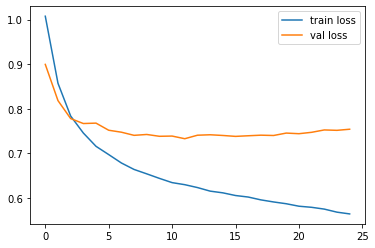

In [20]:
# plot losses
plt.plot(r.history['loss'], label="train loss")
plt.plot(r.history['val_loss'], label="val loss")
plt.legend()
plt.show()

## Step 5: Predict

In [21]:
unique_new_movieId = df_ratings.new_movieId.unique()

In [22]:
def create_df_for_n(n):
    new_df_for_n = df_ratings[df_ratings.userId == n]
    list_of_n_made_the_review = new_df_for_n.new_movieId.unique()
    
    list_of_n_didnt_make_rating = []

    for i in range(len(unique_new_movieId)):
        if unique_new_movieId[i] not in list_of_n_made_the_review:
            list_of_n_didnt_make_rating.append(unique_new_movieId[i])

    list_of_n_didnt_make_rating = np.array(list_of_n_didnt_make_rating)
    
    return list_of_n_made_the_review, list_of_n_didnt_make_rating    

In [31]:
def recommend_5(n):
    list_of_n_made_the_review, list_of_n_didnt_make_rating  = create_df_for_n(n)

    new_input = [n-1] * len(list_of_n_didnt_make_rating) 
    new_input = np.array(new_input)
    
    prediction_for_n = model.predict([new_input, list_of_n_didnt_make_rating]) + avg_rating
    prediction_for_n = prediction_for_n.reshape(-1)
    
    ind = np.argpartition(prediction_for_n, -5)[-5:]
    
    return prediction_for_n[ind], list_of_n_didnt_make_rating[ind], ind

In [32]:
def new_movieId_to_title(i):
    j = np.array(df_ratings[df_ratings.new_movieId == i])[0][1] 
    x = df_movies[df_movies.movieId == j]
    return np.array(x.title)[0], np.array(x.genres)[0]

In [33]:
unique_userid = list(set(userId))

In [36]:
for i in range(5):

    n = np.random.choice(unique_userid)
    recommendation, genre, ind = recommend_5(n)
    print("Recommendations for userId", n, "are")

    for j in range(5):
        a, b = new_movieId_to_title(ind[j])
        print(a, "in", b, 'with score', recommendation[j])
    print()
    print()

Recommendations for userId 541 are
Beyond Bedlam (1993) in Drama|Horror with score 4.493879
Last Unicorn, The (1982) in Animation|Children|Fantasy with score 4.5215445
Adventures of Sebastian Cole, The (1998) in Comedy|Drama with score 4.5603075
Nightmare on Elm Street, A (2010) in Fantasy|Horror|Thriller with score 4.5269933
3 Women (Three Women) (1977) in Drama with score 4.517896


Recommendations for userId 214 are
Mickey's Once Upon a Christmas (1999) in Animation|Comedy|Fantasy with score 3.7240367
Jesus Christ Superstar (1973) in Drama|Musical with score 3.7448378
Expendables, The (2010) in Action|Adventure|Thriller with score 3.8141973
Only Angels Have Wings (1939) in Adventure|Drama|Romance with score 3.79527
Money Train (1995) in Action|Comedy|Crime|Drama|Thriller with score 3.7349608


Recommendations for userId 67 are
Not One Less (Yi ge dou bu neng shao) (1999) in Drama with score 4.528142
Coffy (1973) in Action|Crime|Thriller with score 4.5293713
Bringing Down the House (